# PlanetaRY spanGLES

This is the initialization file of the `Pryngles` package.

## Warnings

In [1]:
import unittest
import warnings
import dill
import inspect
from collections import OrderedDict as odict
from collections.abc import Iterable
from copy import deepcopy
from colorsys import hls_to_rgb
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Jupyter compatibilty

In [2]:
"""
The purpose of the get_ipython class is to provide some response in the python 
script resulting from the conversion of this notebook.

If you want to add another IPyhton function resulting from a magic command to the class, 
please verify in the resulting python script the corresponding IPython command.

For instance, the magic "%matplotlib nbagg" is converted into:

    get_ipython().magic('matplotlib nbagg',globals())

So, the method "magic" should be add to the get_ipython() class.        
"""
from IPython.display import HTML, Image, display
import IPython.core.autocall as autocall
from IPython import get_ipython
import sys

try:
    cfg=get_ipython().config
except AttributeError:
    def Image(url="",filename="",f=""):
        pass
    class get_ipython(object):
        def run_line_magic(self,*args):
            pass
        def run_cell_magic(self,x,y,z):
            pass
        def magic(self,command,scope=globals()):
            pass

#Magics can only be located from here
%load_ext autoreload
%autoreload 2

## Verbosity

In [3]:
"""Verbosity levels:
SIMPLE: Simple messages.
SYSTEM: System operations.
VERIFY: Message to verify operations
"""
VERB_NONE=0
VERB_SIMPLE=1
VERB_SYSTEM=2
VERB_VERIFY=3
VERB_DEEP=4
VERB_ALL=100

In [4]:
class Verbose(object):
    """Verbose print in the package
    
    Attributes:
        VERBOSITY: int, default = 0:
            Level of verbosity.
            
    Methods:
        print(level,msg):
            Print a message if level<=VERBOSITY.
    
    Example:
    
        Verbose.print(1,"Hello world") #No print
        
        Verbose.print(0,"Hello world") #Print

        Verbose.VERBOSITY=1
        Verbose.print(1,"Hello world") #Print
        
        Verbose.VERBOSITY=2
        Verbose.print(1,"Hello world") #Print
        
        Verbose.VERBOSITY=2
        Verbose.print(4,"Hello world") #No print
    """
    VERBOSITY=VERB_ALL
    def print(level,*args):
        if level<=Verbose.VERBOSITY:
            print("  "*level+f"VERB{level}::{inspect.stack()[1][3]}::",*args)

verbose=Verbose.print

## PrynglesCommon

Many of the classes in Pryngles inherite methods of this common class

In [5]:
class PrynglesCommon(object):
    
    def save_to(self,filename):
        """Save object to a binary file
        
        Parameters:
            filename: string:
                Name of the file where the object will be stored.
                
            compressed: boolean, default = False:
                If True the file will be stored compressed.
        
        Notes:
            Based on https://betterprogramming.pub/load-fast-load-big-with-compressed-pickles-5f311584507e.
        """
        verbose(VERB_SYSTEM,f"Saving object to {filename}")
        pikd = open(filename,"wb")
        dill.dump(self, pikd)
        pikd.close()
            
    def load_from(self,filename,compressed=False):
        verbose(VERB_SYSTEM,f"Loading object from {filename}")
        pikd = open(filename,"rb")
        data = dill.load(pikd)
        pikd.close()
        verbose(VERB_VERIFY,f"Transferring data to new object")
        self.__dict__=data.__dict__
        return data
    
    def __str__(self):
        #Remove private attributes
        return str({k:v for k,v in self.__dict__.items() if k[0]!='_'})

## Miscelaneous Class

In [6]:
Misc_doc=\
"""
Miscelaneous routines.

This is a set of util routines intended for a diversity of purposes.

Routines included:

    get_data(file)
""";

In [12]:
class Misc(object):
    def get_data(path):
        """
        Get the full path of the `datafile` which is one of the datafiles provided with the package.
        
        Parameters:
            datafile: Name of the data file, string.
            
        Return:
            Full path to package datafile in the python environment.
            
        """
        return os.path.join(ROOTDIR,'data',path);
    
    def print_df(df):
        """
        Print DataFrame.
        
        Parameters:
            df: Pandas DataFrame:
                DataFrame to print.
        """
        display(HTML(df.to_html()))
        
    def rgb(hls,to_hex=False):
        """Convert from hue (0-360), level (0-1) and saturation (0-1) to RGB
        
        Parameters:
        
            hls: array(3):
                Array with values of color:
                    hls[0]: hue, 0-360, see https://pythonfordesigners.com/tutorials/hsl-color-wheel/
                    hls[1]: level, 0: black, 1: white
                    hls[2]: saturation, 0: gray, 1: full-color
                    
        Return:
        
            rgb: array(3):
                Array with rgb values (R: red, G: green, B: blue)
        """
        rgb_color=hls_to_rgb(hls[0]/360.0,hls[1],hls[2])
        if to_hex:
            hex_color="#{:02x}{:02x}{:02x}".format(int(rgb_color[0]*255),
                                                   int(rgb_color[1]*255),
                                                   int(rgb_color[2]*255))
            return hex_color
        return rgb_color
    
    def rgb_sample(H=0):
        """Create a color table for a given hue
        """
        fig,ax=plt.subplots(figsize=(9,9))
        dL=0.1
        dS=0.1
        for S in np.arange(0,1+dS,dS):
            for L in np.arange(0,1+dL,dL):
                c=Circle((L,S),dL/2.5,color=Misc.rgb([H,L,S]))
                ax.add_patch(c)
                ax.text(L,S,f"S={S:.1g},L={L:.1g}",ha='center',va='center',fontsize=6,color='y')
        ax.axis("off")
        ax.axis("equal")
        plt.tight_layout()
            
Misc.__doc__=Misc_doc

In [13]:
def flatten(collection):
    """Flatten a list of objects

    Examples:
        list(Misc.flatten(["cosa"]))
        list(Misc.flatten([["cosa"]]))
        list(Misc.flatten([["cosa","perro"]]))
        list(Misc.flatten([[1,"perro"],object,float]))
    """
    for i in collection:
        if isinstance(i, Iterable) and not isinstance(i, basestring):
            for subc in Misc.flatten(i):
                yield subc
        else:
            yield i
Misc.flatten=flatten

## Pryngles modules

In [15]:
from pryngles.version import *
from pryngles.consts import *
from pryngles.science import *
from pryngles.plot import *
from pryngles.sampler import *
from pryngles.spangler import *
from pryngles.body import *
from pryngles.system import *
from pryngles.legacy import *
#Reset verbosity
Verbose.VERBOSITY=VERB_NONE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Tests

In [16]:
if IN_JUPYTER:
    def test_common(self):
        
        import numpy as np
        import pandas as pd
        import os
        
        Verbose.VERBOSITY=VERB_ALL
        
        p=PrynglesCommon()
        p.casa=dict(perro=0,gato=3)
        p.data=pd.DataFrame(np.random.rand(4000,100))
        p.save_to("/tmp/save.pck")
        print("File size:",os.path.getsize("/tmp/save.pck")/1e6," Mb")
        g=PrynglesCommon()
        g.load_from("/tmp/save.pck")
        print(g.casa,np.array(g.data).shape)
        
        Verbose.VERBOSITY=VERB_NONE
        
    class Test(unittest.TestCase):pass    
    Test.test_common=test_common
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

.

    VERB2::save_to:: Saving object to /tmp/save.pck
File size: 3.200736  Mb
    VERB2::load_from:: Loading object from /tmp/save.pck
      VERB3::load_from:: Transferring data to new object
{'perro': 0, 'gato': 3} (4000, 100)



----------------------------------------------------------------------
Ran 1 test in 0.037s

OK


/Users/jorgezuluagacallejas/Dropbox/MiInvestigacion/PapersEnProceso/Exorings/pryngles/src/pryngles/data/diffuse_reflection_function.data


,a,b,c
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


(0.75, 0.475, 0.25)


<IPython.core.display.Javascript object>


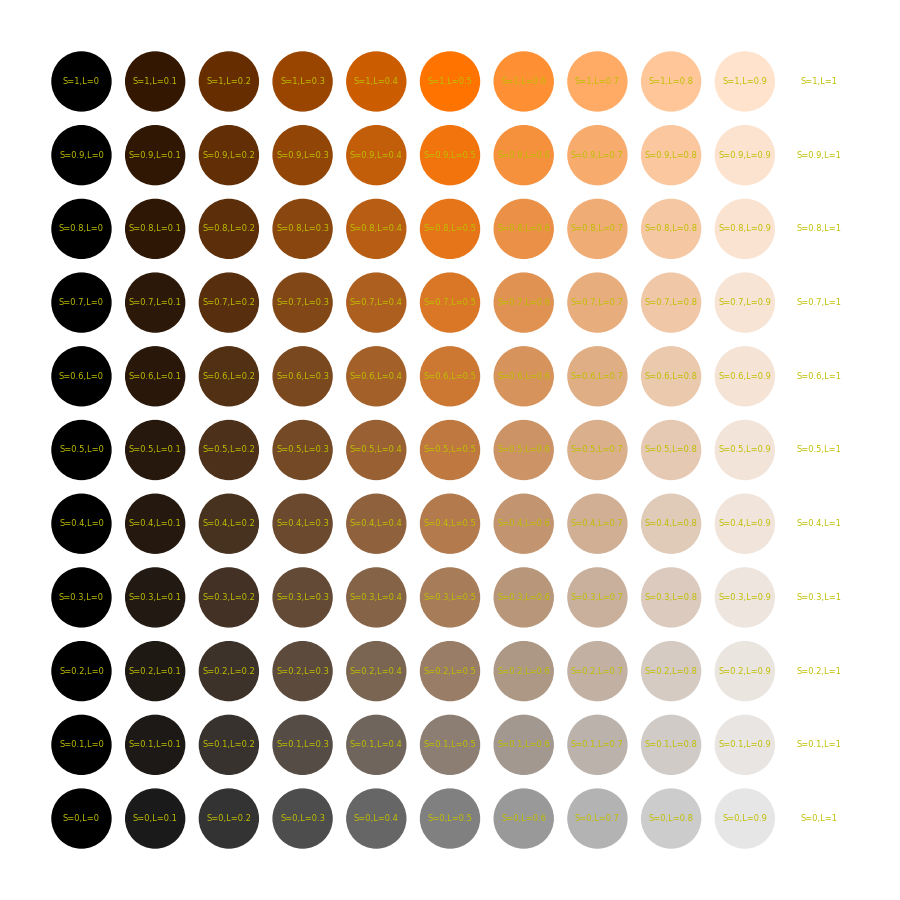

.

['hola']
['hola', 'perro', 'gato']



----------------------------------------------------------------------
Ran 1 test in 0.107s

OK


In [17]:
if IN_JUPYTER:
    def test_misc(self):
        
        #Get path
        filepath=Misc.get_data("diffuse_reflection_function.data")
        print(filepath)
        
        #print_df dataframe
        import pandas as pd
        import numpy as np
        df=pd.DataFrame(np.zeros((5,3)),columns=["a","b","c"])
        Misc.print_df(df)
        
        #rgb
        print(Misc.rgb([27,0.5,0.5]))
        
        #Color sample
        Misc.rgb_sample(27)
        
        #Flatten
        print(list(Misc.flatten(["hola"])))
        print(list(Misc.flatten(["hola",["perro","gato"]])))
        
    class Test(unittest.TestCase):pass    
    Test.test_misc=test_misc
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

--End--